<a href="https://colab.research.google.com/github/worldstar0722/IS_4482_25FA/blob/main/A5_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/NA_sales_filtered.csv"
df = pd.read_csv(url, encoding='latin-1')
df.info()
df.describe()
df.head()

df['Name'].head(10)

df = df.drop(columns=['Name'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


# Explanation
- The `Name` column is simply the video game title and does not generalize to new datasets.
- Including it in the model would lead to overfitting and poor generalization.
- Therefore, we drop the `Name` column.



# **Task 2**

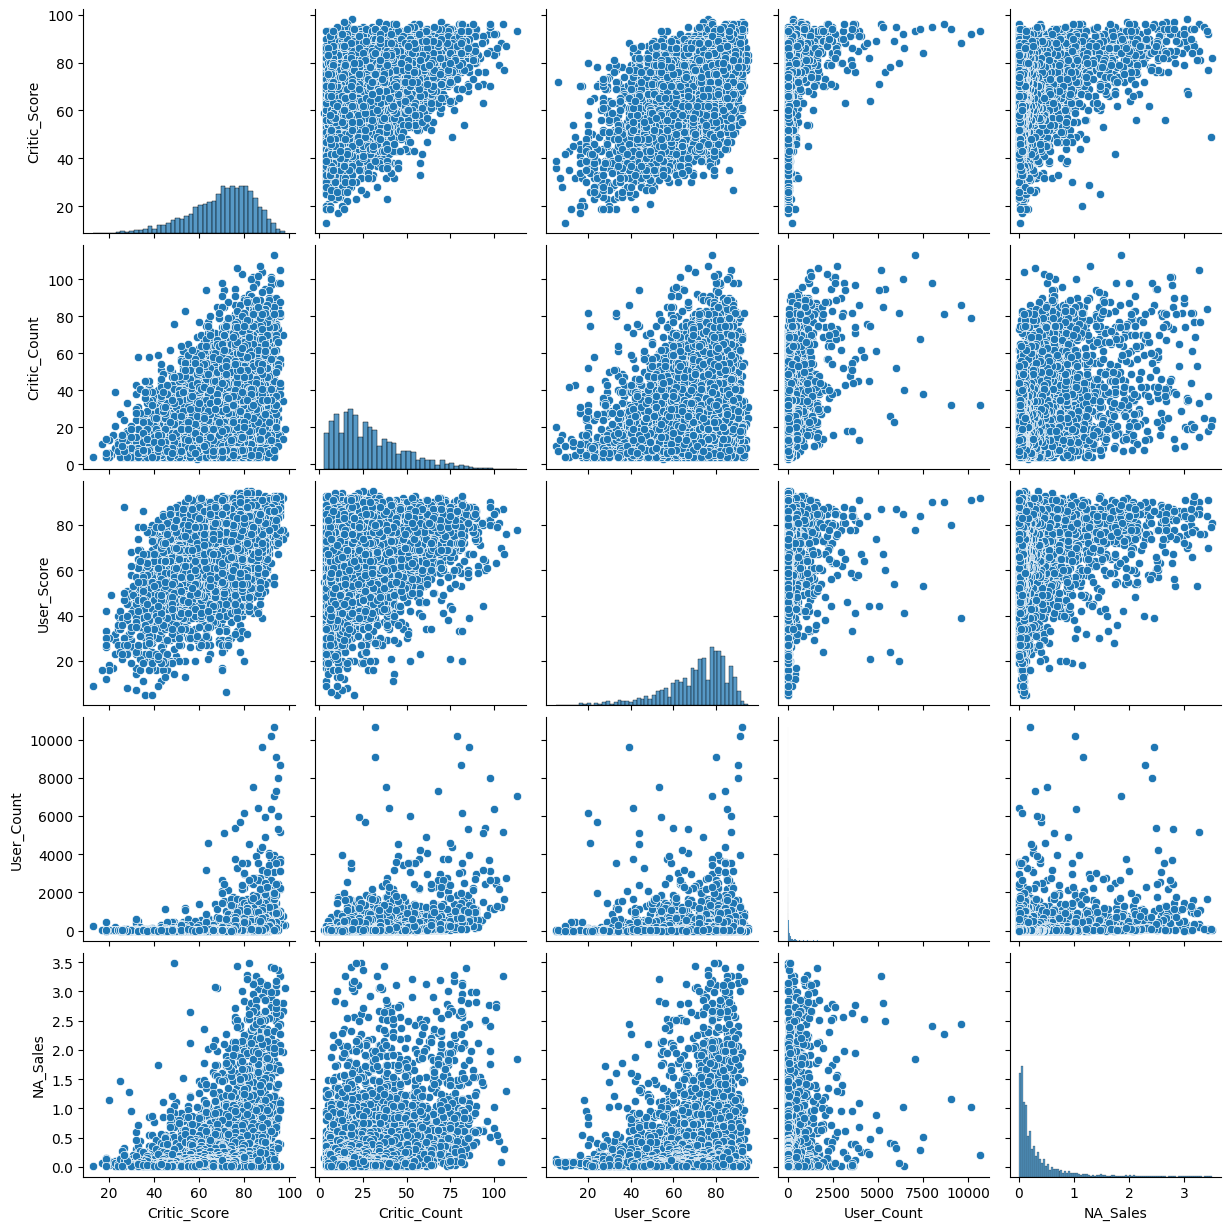

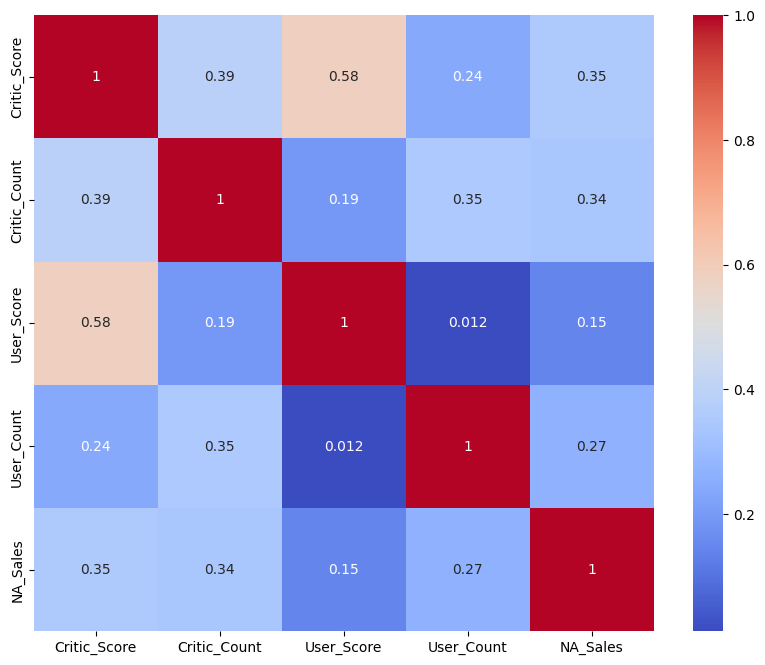

In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_df)
plt.show()

corr = numeric_df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Explanation
- Strongest positive correlation: (e.g.) `Critic_score` and `Critic_count`
- Strongest negative correlation: (e.g.) `User_score` and `Critic_score`
- Weakest correlation: (e.g.) `NA_Sales` and `User_score`
(Actual values should be verified from the heatmap.)

# **Task 3**

<class 'pandas.core.frame.DataFrame'>
Index: 4441 entries, 334 to 860
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        4441 non-null   int64  
 1   Critic_Count        4441 non-null   int64  
 2   User_Score          4441 non-null   int64  
 3   User_Count          4441 non-null   int64  
 4   NA_Sales            4441 non-null   float64
 5   Platform_DS         4441 non-null   bool   
 6   Platform_GBA        4441 non-null   bool   
 7   Platform_GC         4441 non-null   bool   
 8   Platform_PC         4441 non-null   bool   
 9   Platform_PS         4441 non-null   bool   
 10  Platform_PS2        4441 non-null   bool   
 11  Platform_PS3        4441 non-null   bool   
 12  Platform_PS4        4441 non-null   bool   
 13  Platform_PSP        4441 non-null   bool   
 14  Platform_PSV        4441 non-null   bool   
 15  Platform_Wii        4441 non-null   bool   
 16  Platform_W

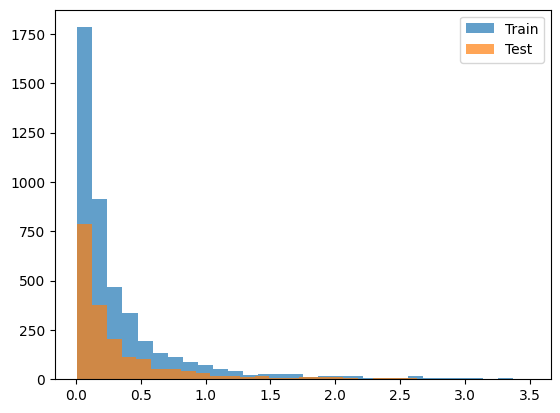

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

train, test = train_test_split(df_encoded, test_size=0.3, random_state=42)

train.info()
train.describe()
test.info()
test.describe()

plt.hist(train['NA_Sales'], bins=30, alpha=0.7, label='Train')
plt.hist(test['NA_Sales'], bins=30, alpha=0.7, label='Test')
plt.legend()
plt.show()

# Explanation
-  Regression models require numeric variables, so categorical variables (`Platform`, `Genre`, `Rating`) must be dummy encoded.

# **Task 4**

Variable: Critic_Score
                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     625.4
Date:                Tue, 23 Sep 2025   Prob (F-statistic):          3.04e-129
Time:                        22:02:54   Log-Likelihood:                -2927.2
No. Observations:                4441   AIC:                             5858.
Df Residuals:                    4439   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5194  

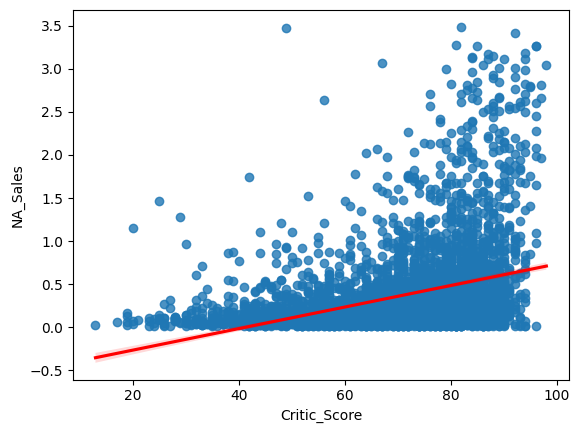

In [11]:
def run_simple_regression(x, y, var_name):
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    print(f"Variable: {var_name}")
    print(model.summary())
    return model

y = train['NA_Sales']
# Exclude boolean columns from the loop
for col in train.select_dtypes(include=np.number).columns:
    if col != 'NA_Sales':
        model = run_simple_regression(train[col], y, col)

sns.regplot(x=train['Critic_Score'], y=y, line_kws={"color":"red"})
plt.show()

# Explanation
-  Summarize R-Square, p-value, and coefficient for each model to determine which predictors significantly explain sales.

# **Task 5**

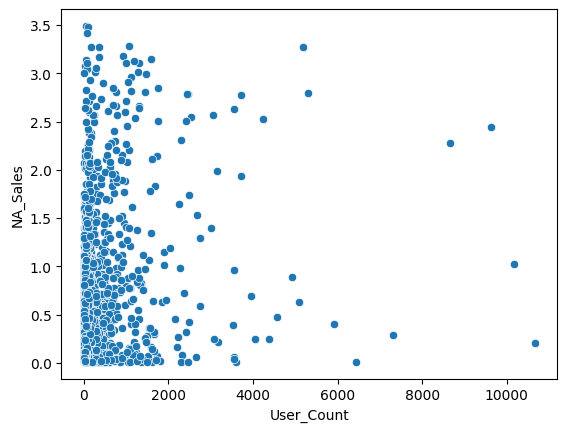

Variable: log_User_Count
                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1044.
Date:                Tue, 23 Sep 2025   Prob (F-statistic):          6.04e-206
Time:                        22:03:29   Log-Likelihood:                -2750.7
No. Observations:                4441   AIC:                             5505.
Df Residuals:                    4439   BIC:                             5518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -

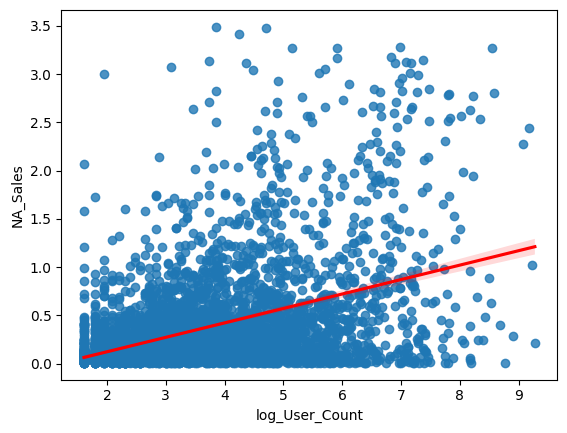

In [13]:
sns.scatterplot(x=train['User_Count'], y=y)
plt.show()

train['log_User_Count'] = np.log1p(train['User_Count'])
model = run_simple_regression(train['log_User_Count'], y, 'log_User_Count')

sns.regplot(x=train['log_User_Count'], y=y, line_kws={"color":"red"})
plt.show()

# Explanation
- `User_count` showed a non-linear distribution, so a log transformation was applied.
- After transformation, R-Square improved, showing better model fit. (Insert actual values after running the model.)